# Logistic Regression Project

## Task overview

* Using the given dataset on patient medical information, create a logistic regression model capable of classifying a patient with or without Coronary Heart Disease within 10 years.
* Patients classified as 'at Risk' = 1, patients 'not at risk' = 0

In [228]:
# Importing common data science packages for data manipulation

import pandas as pd
import numpy as np

# Visualisation packages

import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# Machine Learning and statistical analysis

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn import metrics
from sklearn.metrics import RocCurveDisplay

import statsmodels.api as sm

# Enabling the plots to show automatically

%matplotlib inline

## Data Preprocessing & Cleaning

In [229]:
# Loading in and previewing data from csv file.

data = pd.read_csv('heart_dis.csv')
display(data.head())
print(f'Raw data contains: {len(data)} records.')

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


Raw data contains: 4238 records.


In [231]:
# Verifying data types for columns.
# (All columns are numerical).

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [232]:
# Getting an overview of the data

data.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [234]:
# Checking the proportions of the target variable.
# The data is quite imbalanced, something to keep in mind later.

round(data['TenYearCHD'].value_counts(normalize=True)*100)

0    85.0
1    15.0
Name: TenYearCHD, dtype: float64

<AxesSubplot:>

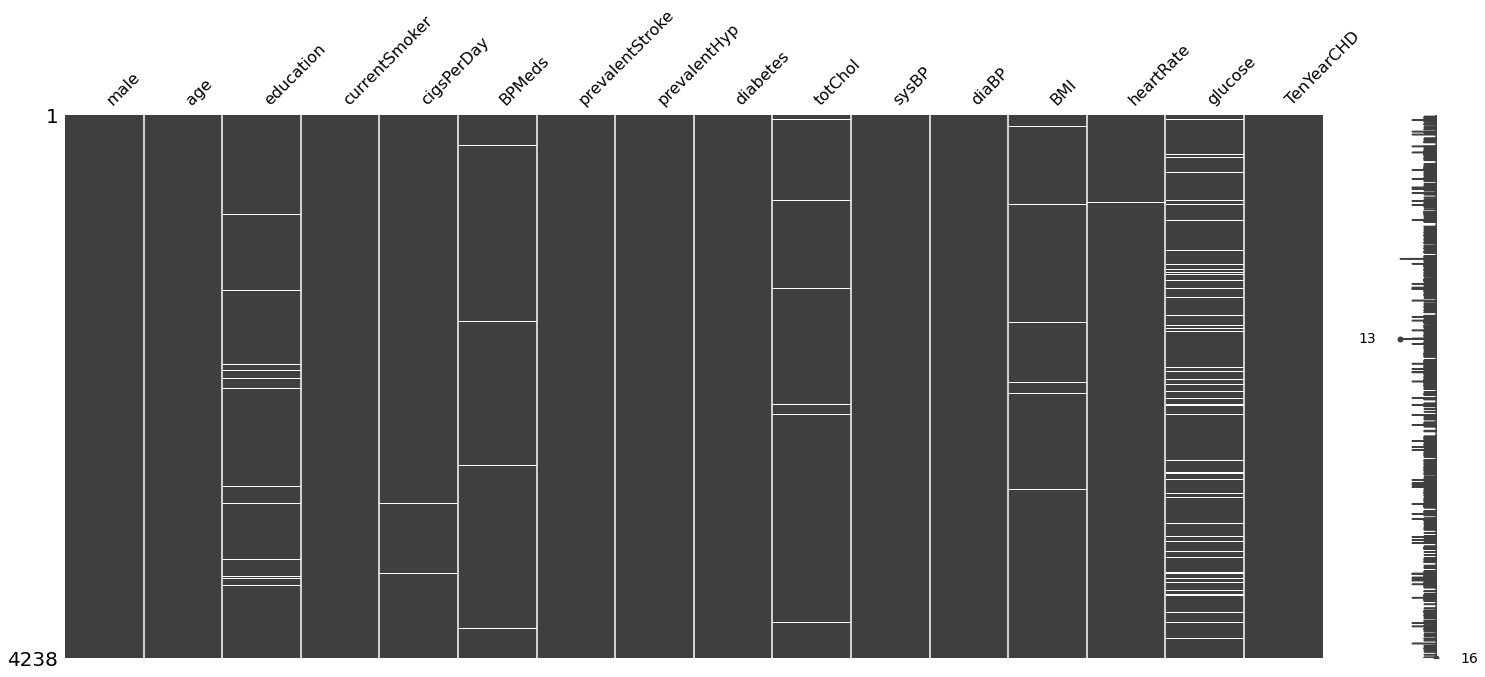

In [235]:
# Checking for null values

msno.matrix(data)

In [237]:
# Checking the proportion of null values for each column
# Here, each column shows relatively few missing values.

data.isna().sum()/len(data)*100

male               0.000000
age                0.000000
education          2.477584
currentSmoker      0.000000
cigsPerDay         0.684285
BPMeds             1.250590
prevalentStroke    0.000000
prevalentHyp       0.000000
diabetes           0.000000
totChol            1.179802
sysBP              0.000000
diaBP              0.000000
BMI                0.448325
heartRate          0.023596
glucose            9.155262
TenYearCHD         0.000000
dtype: float64

In [239]:
# Trying to understand, if the missing data is balanced in terms of the target variable
# Here, there is a very similar proportion of the target values among the missing values and the overall data.

missing_data = data[data.isna().any(axis=1)]
missing_data['TenYearCHD'].value_counts(normalize=True)*100

0    85.051546
1    14.948454
Name: TenYearCHD, dtype: float64

In [240]:
# As there is a small percentage of null values, and evenly distributed, the missing values will be removed.

drop_data = data.dropna()
drop_data

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4231,1,58,3.0,0,0.0,0.0,0,1,0,187.0,141.0,81.0,24.96,80.0,81.0,0
4232,1,68,1.0,0,0.0,0.0,0,1,0,176.0,168.0,97.0,23.14,60.0,79.0,1
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0


## Exploratory Data Analysis

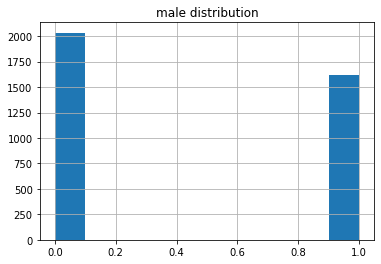

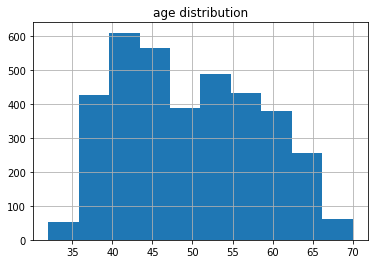

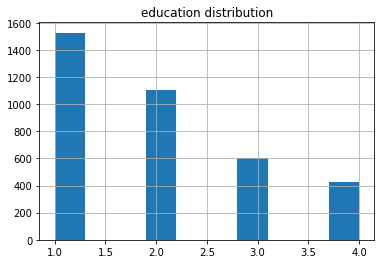

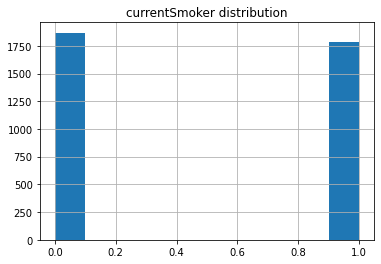

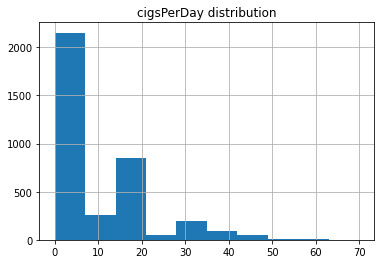

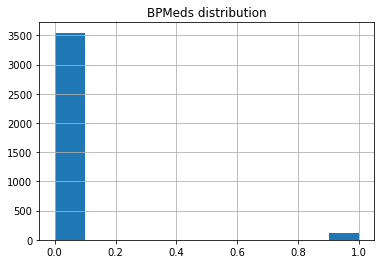

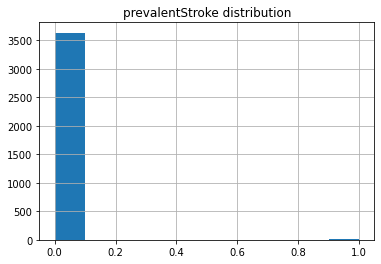

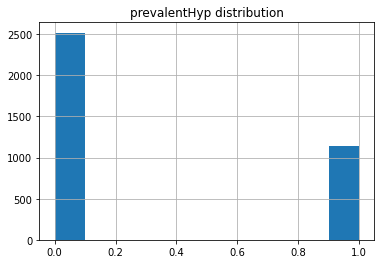

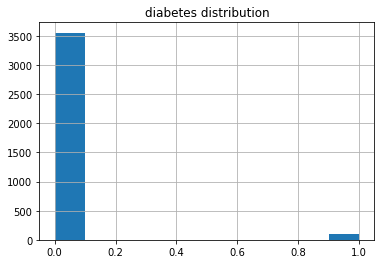

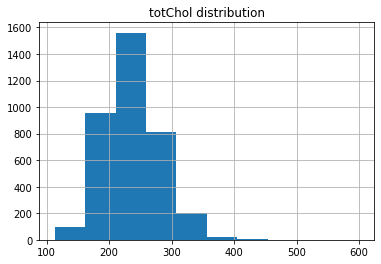

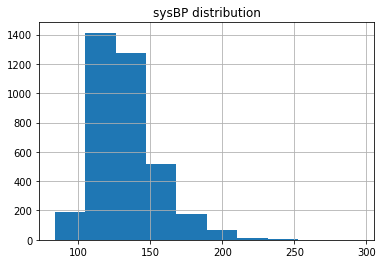

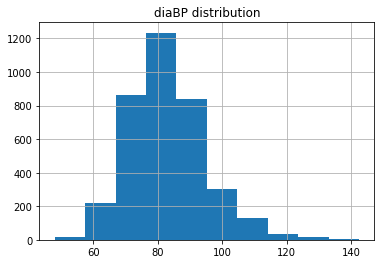

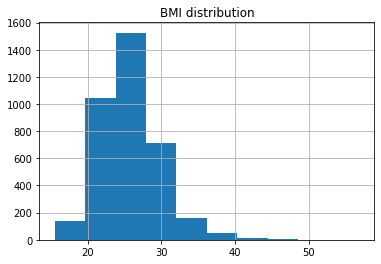

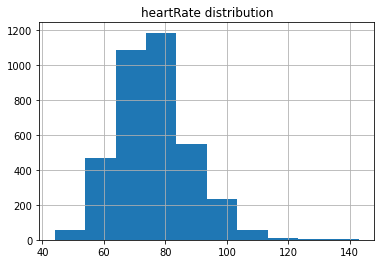

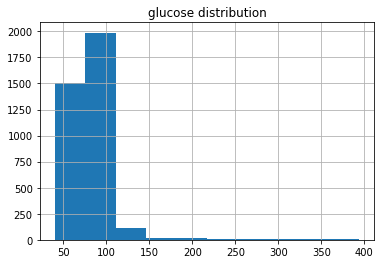

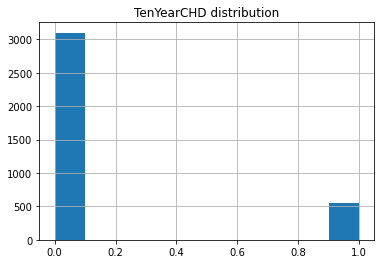

In [242]:
# Small function to show histograms of each variable.
# Some outliers can be seen among the continuous variables, with positively-skewed distribtuions.

def show_col_hists(df):
    for col in df:
        df[col].hist()
        plt.title(f'{col} distribution')
        plt.show()

show_col_hists(drop_data)

In [243]:
# Function to remove outliers based on IQR method. outlier_cols argument specifies which columns to trim.

def remove_outliers_iqr(data, outlier_cols, threshold=1.5):
    cleaned_data = data.copy()  # Create a copy of the data to avoid modifying the original

    for column in data[outlier_cols]:        
        # Calculate the first and third quartiles for the column
        q1 = np.percentile(data[column], 25)
        q3 = np.percentile(data[column], 75)

        # Calculate the IQR for the column
        iqr = q3 - q1

        # Define the lower and upper bounds for outlier detection
        lower_bound = q1 - threshold * iqr
        upper_bound = q3 + threshold * iqr

        # Identify outliers for the column
        outliers = (data[column] < lower_bound) | (data[column] > upper_bound)

        # Remove outliers from the column
        cleaned_data.loc[outliers, column] = np.nan

    return cleaned_data


In [244]:
# Giving a list of continuous variables with visible outliers and calling the outlier removal function.

outlier_cols = ['totChol', 'sysBP', 'BMI', 'glucose']

trim_data = remove_outliers_iqr(drop_data, outlier_cols)
trim_data

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4231,1,58,3.0,0,0.0,0.0,0,1,0,187.0,141.0,81.0,24.96,80.0,81.0,0
4232,1,68,1.0,0,0.0,0.0,0,1,0,176.0,168.0,97.0,23.14,60.0,79.0,1
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0


In [245]:
trim_data.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3610.000000,3548.000000,3656.000000,3571.000000,3656.000000,3481.000000,3656.000000
mean,0.443654,49.557440,1.979759,0.489059,9.022155,0.030361,0.005744,0.311543,0.027079,235.159834,130.309611,82.912062,25.472240,75.730580,78.441540,0.152352
std,0.496883,8.561133,1.022657,0.499949,11.918869,0.171602,0.075581,0.463187,0.162335,40.926445,18.766836,11.974825,3.507981,11.982952,11.038677,0.359411
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,124.000000,83.500000,48.000000,15.960000,44.000000,47.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,116.000000,75.000000,23.045000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,233.000000,127.500000,82.000000,25.270000,75.000000,77.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,262.000000,142.000000,90.000000,27.815000,82.000000,85.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,347.000000,184.500000,142.500000,35.420000,143.000000,111.000000,1.000000


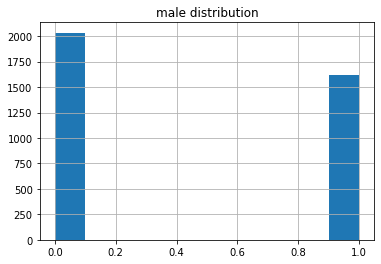

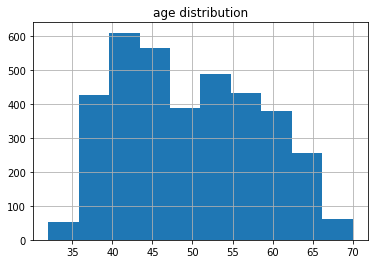

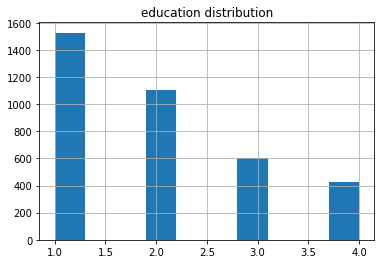

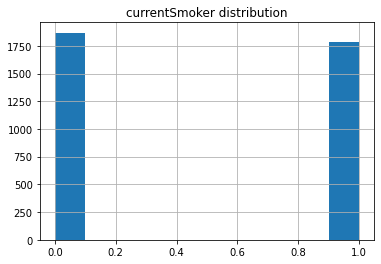

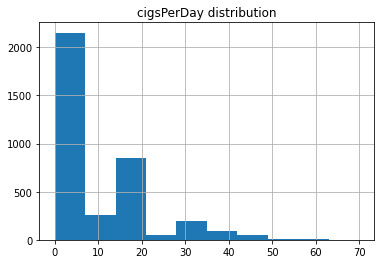

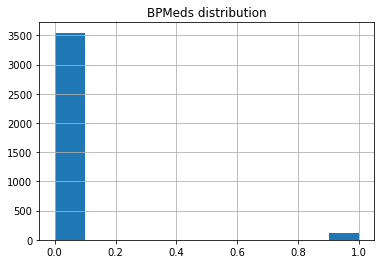

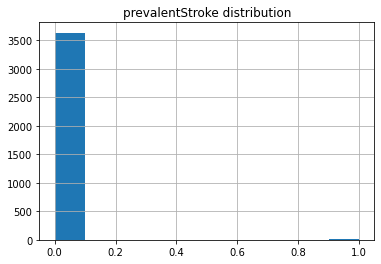

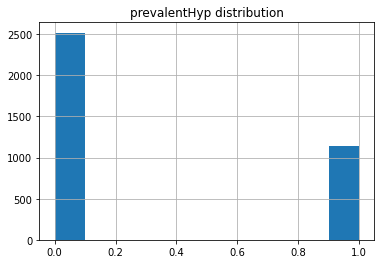

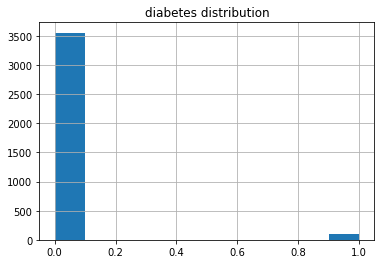

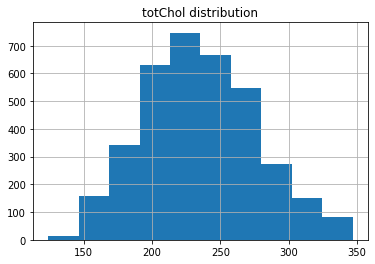

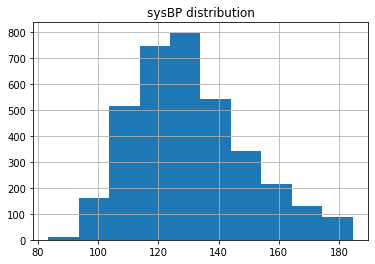

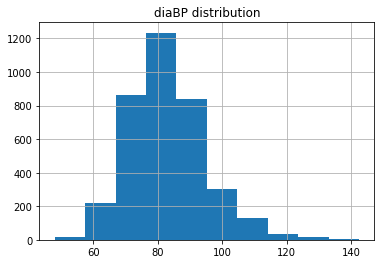

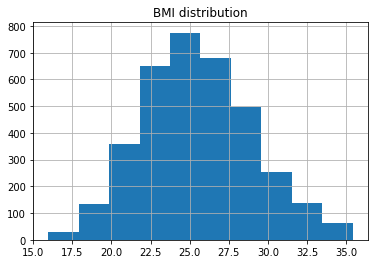

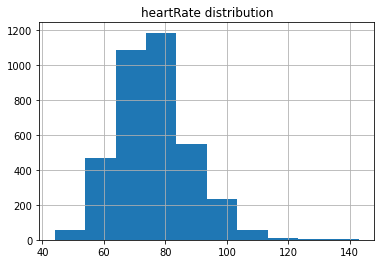

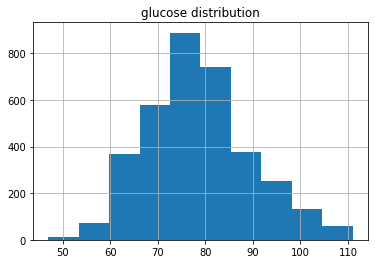

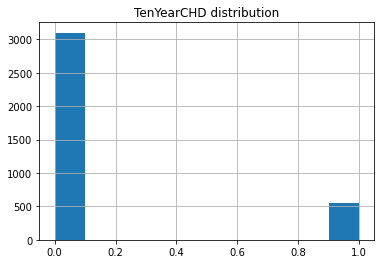

In [247]:
# Checking the trimmed distributions of each variable.
# The affected variables are now much more normally distributed.

show_col_hists(trim_data)

<AxesSubplot:>

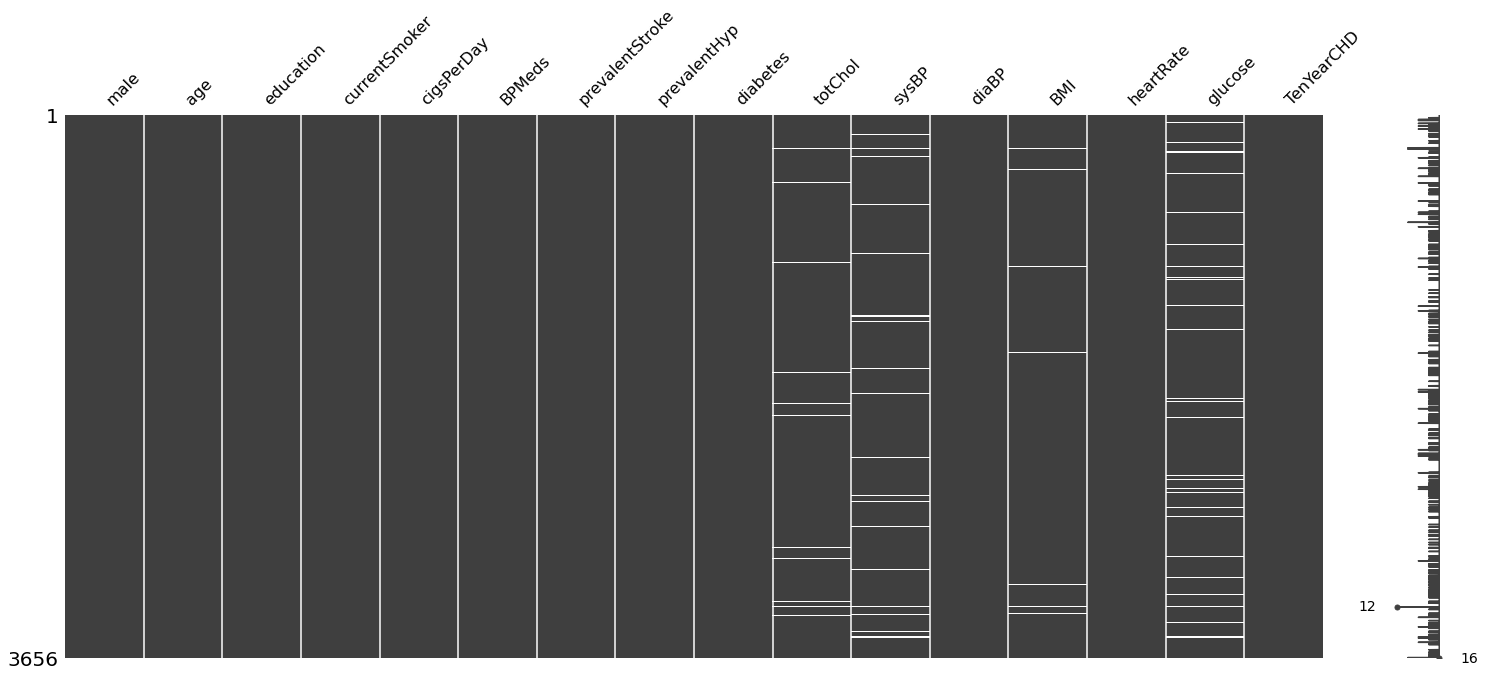

In [248]:
# Outlier function converted outliers to nulls so now removing 'new' null values.

msno.matrix(trim_data)

In [249]:
# Removing the null values.

norm_data = trim_data.dropna()

In [250]:
# Checking the new overview of the dataframe.

norm_data.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3288.000000,3288.000000,3288.000000,3288.000000,3288.000000,3288.000000,3288.000000,3288.000000,3288.000000,3288.000000,3288.000000,3288.000000,3288.000000,3288.000000,3288.000000,3288.000000
mean,0.453467,49.073905,2.008820,0.496046,9.229015,0.022202,0.004866,0.273418,0.006995,234.386253,129.465328,81.793948,25.406189,75.232056,78.351582,0.135645
std,0.497906,8.462898,1.025792,0.500060,12.035296,0.147362,0.069599,0.445782,0.083357,40.660651,18.327125,10.819447,3.492994,11.787645,10.986586,0.342463
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,124.000000,83.500000,48.000000,16.480000,44.000000,47.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,205.000000,116.000000,74.000000,22.927500,67.000000,71.000000,0.000000
50%,0.000000,48.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,232.000000,127.000000,81.000000,25.165000,75.000000,77.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,261.000000,140.625000,88.000000,27.730000,81.250000,85.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,347.000000,184.500000,130.000000,35.420000,143.000000,111.000000,1.000000


In [251]:
# Small function to create a heatmap with some specific style settings.

def create_heatmap(df, title):
    corr_map = df.corr(method='spearman')
    plt.figure(figsize=(25,20))
    hmap = sns.heatmap(corr_map, cmap='PRGn', vmin=-1, vmax=1, annot=True)
    hmap.set_title(title, fontsize=20)

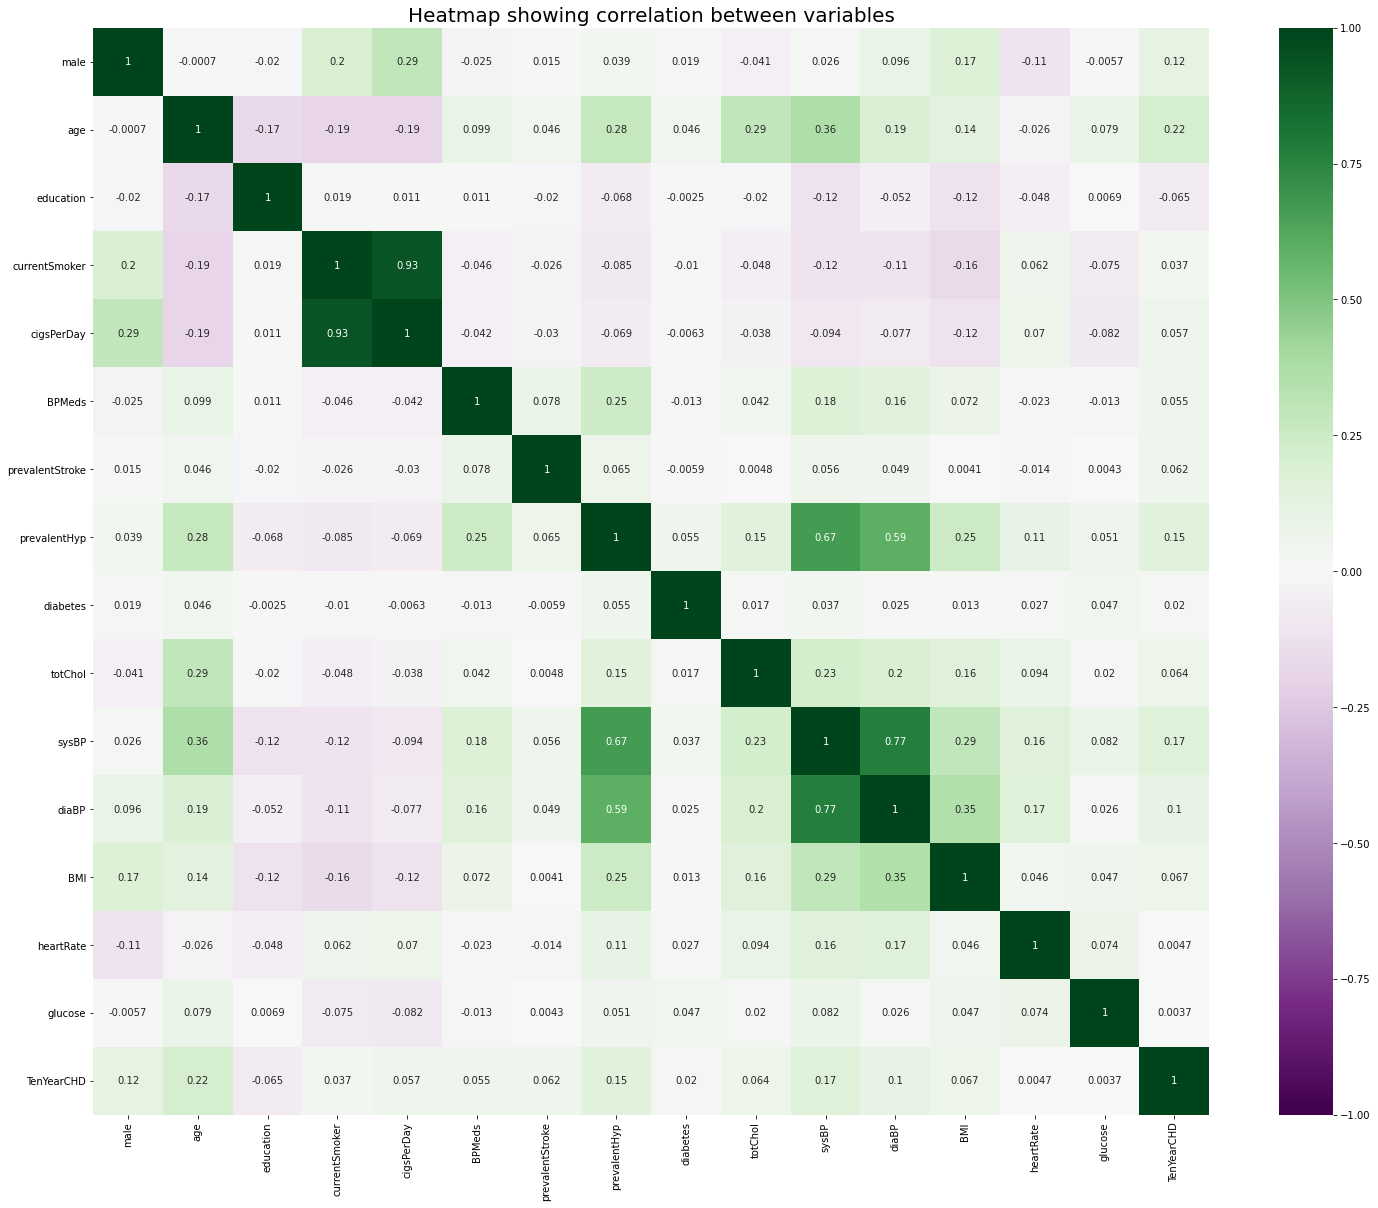

In [252]:
create_heatmap(norm_data, 'Heatmap showing correlation between variables')

In [253]:
# Dropping 3 columns due to high correlation with non-target variables, avoiding issues of multicollinearity.

df_drop = norm_data.drop(columns=['currentSmoker', 'diaBP', 'prevalentHyp'])

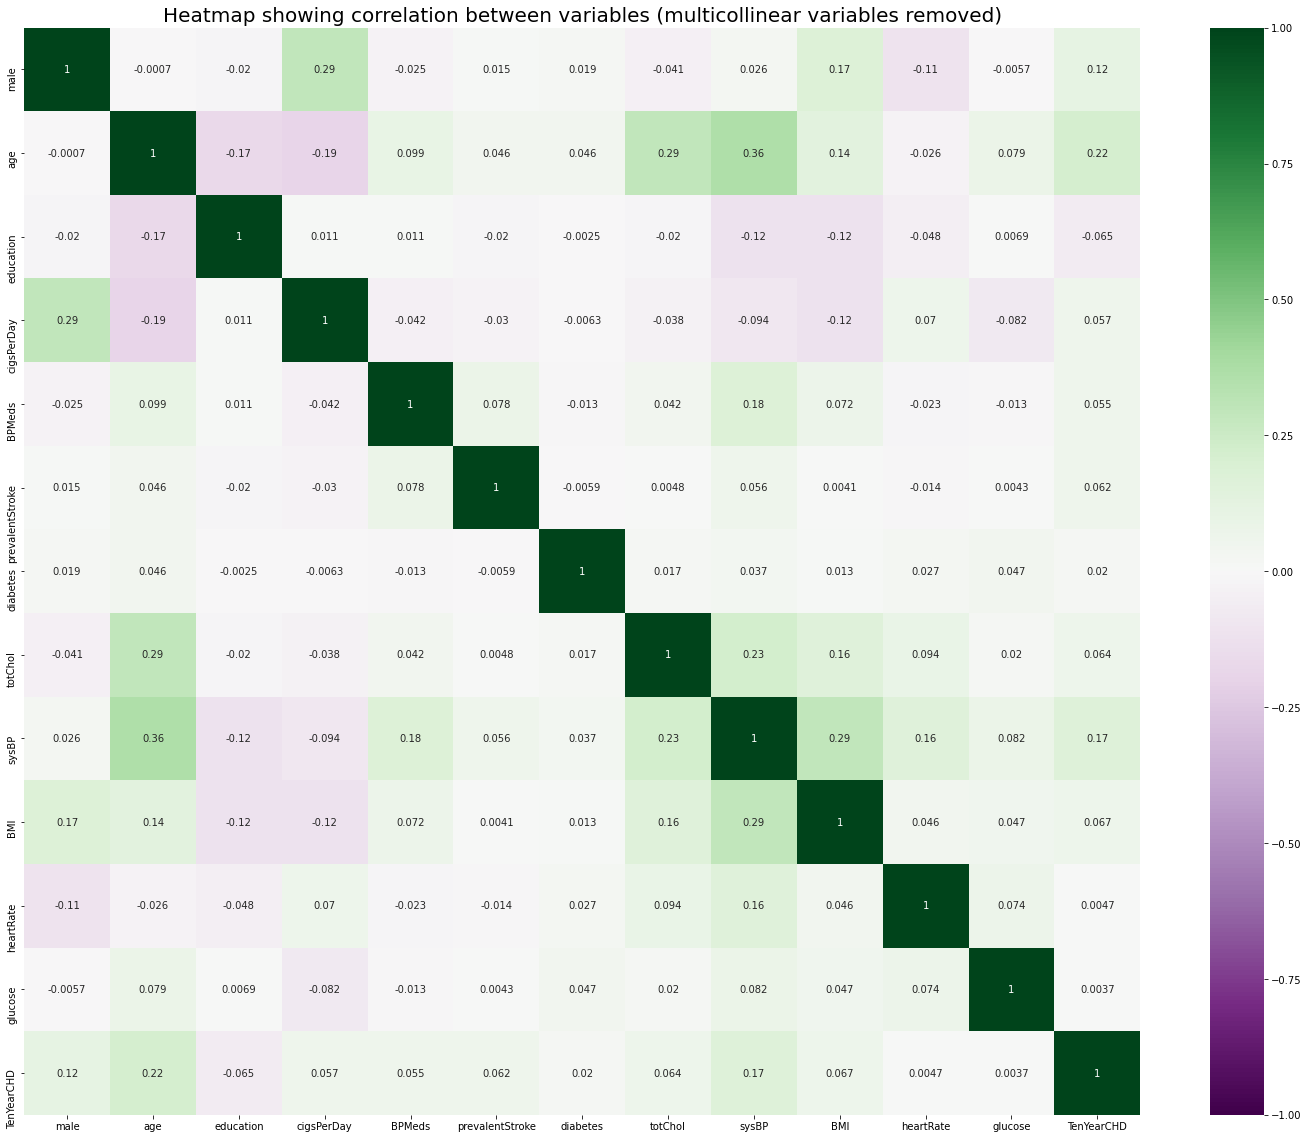

In [255]:
# Plotting the trimmed heatmap.

create_heatmap(df_drop, 'Heatmap showing correlation between variables (multicollinear variables removed)')

In [256]:
# Renaming the dataframe for clarity

df = df_drop

## Model Creation

In [257]:
# Separating the target variable from the independent variables.

X = df.drop(columns=['TenYearCHD'], axis=1)
Y = np.array(df['TenYearCHD'])
#Y = Y.reshape(-1,1)

In [258]:
# Standardizing the data among the independent variables
# In this instance it didn't improve the model too much, though it didn't hurt to include it.

scaler = StandardScaler()
std_X = scaler.fit_transform(X)

# Converting the standardized data back to a DataFrame (in order to keep the variable names.)

std_X = pd.DataFrame(std_X, columns=X.columns)

# Verifying the standardization worked well

std_X.head()

,male,age,education,cigsPerDay,BPMeds,prevalentStroke,diabetes,totChol,sysBP,BMI,heartRate,glucose
0,1.097830,-1.190542,1.941410,-0.766946,-0.150685,-0.069928,-0.083931,-0.968805,-1.280555,0.447767,0.404548,-0.123040
1,-0.910888,-0.363277,-0.008599,-0.766946,-0.150685,-0.069928,-0.083931,0.384060,-0.461972,0.951710,1.677260,-0.214074
2,1.097830,-0.126915,-0.983604,0.895086,-0.150685,-0.069928,-0.083931,0.261072,-0.107252,-0.018952,-0.019689,-0.760277
3,-0.910888,1.409436,0.966405,1.726102,-0.150685,-0.069928,-0.083931,-0.230879,1.120623,0.908760,-0.868164,2.243842
4,-0.910888,-0.363277,0.966405,1.144391,-0.150685,-0.069928,-0.083931,1.244974,0.029178,-0.660333,0.828786,0.605232


In [260]:
# Selecting the best features using RFE. Looping through to find the optimal number of features.

# Lists to store comparison values.

num_features = []
log_like = []
list_of_features = []

for i in range(1,len(std_X.columns)):

    #Creating the RFE object and iterating through progressively larger numbers of columns to find optimal size    
    estimator = LogisticRegression()
    rfe = RFE(estimator=estimator, n_features_to_select=i)
    rfe.fit(std_X, Y)
    
    # Using the 'best' features only to create the model
    selected_features = std_X.columns[rfe.support_]
    X_selected = rfe.transform(std_X)

    # Creating the model and appending the scores/features to the lists above
    sm_model = sm.Logit(Y, sm.add_constant(X_selected)).fit()
    num_features.append(i)
    log_like.append(sm_model.llf)
    list_of_features.append(selected_features)
    
print('')    
print(f'List of log-likelihoods: {log_like}')

Optimization terminated successfully.
         Current function value: 0.372552
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.365520
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.359190
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.356337
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.355736
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.355678
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.355625
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.355575
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.355559
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.355536
  

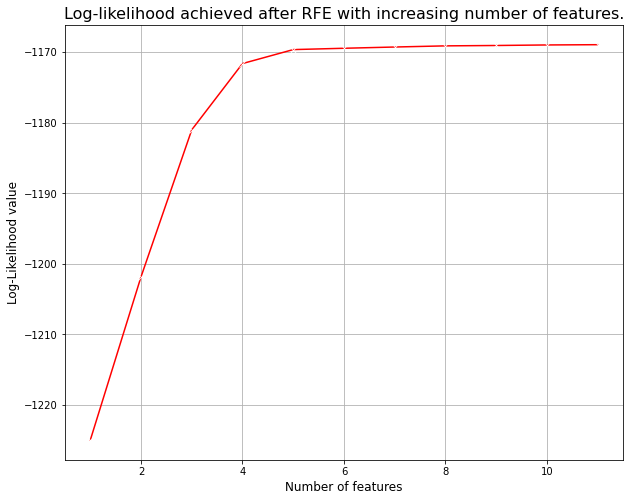

In [263]:
# Plotting the results of the RFE feature selection.
# Trying to understand at what point the model stops improving.

plt.figure(figsize=(10,8))
sns.lineplot(x=num_features, y=log_like, marker='x', color='red')
plt.title('Log-likelihood achieved after RFE with increasing number of features.', fontsize=16)
plt.xlabel('Number of features', fontsize=12)
plt.ylabel('Log-Likelihood value', fontsize=12)
plt.grid()

In [264]:
# Based on the plot above, selecting only the top 5 features.

estimator = LogisticRegression()
rfe = RFE(estimator=estimator, n_features_to_select=5)
rfe.fit(std_X, Y)

selected_features = std_X.columns[rfe.support_]
X_selected = rfe.transform(std_X)

# Converting back into a dataframe in order to maintain the column names.

X_selected_df = pd.DataFrame(X_selected, columns=selected_features)
X_selected_df

,male,age,cigsPerDay,prevalentStroke,sysBP
0,1.097830,-1.190542,-0.766946,-0.069928,-1.280555
1,-0.910888,-0.363277,-0.766946,-0.069928,-0.461972
2,1.097830,-0.126915,0.895086,-0.069928,-0.107252
3,-0.910888,1.409436,1.726102,-0.069928,1.120623
4,-0.910888,-0.363277,1.144391,-0.069928,0.029178
...,...,...,...,...,...
3283,1.097830,1.054893,-0.766946,-0.069928,0.629473
3284,1.097830,2.236701,-0.766946,-0.069928,2.102923
3285,1.097830,0.109447,-0.683844,-0.069928,2.703218
3286,1.097830,0.227627,2.806422,-0.069928,-0.161825


In [265]:
# Splitting the data into training and testing sets.


X_train, X_test, Y_train, Y_test = train_test_split(X_selected_df, Y, test_size=0.2, stratify=Y, random_state=5)

print(X_train.shape)
print(Y_train.shape)

# Creating a logistic regression model in statsmodels to understand the significance of each variable

log_reg = sm.Logit(Y_train, sm.add_constant(X_train)).fit()

print(log_reg.summary())


(2630, 5)
(2630,)
Optimization terminated successfully.
         Current function value: 0.356734
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 2630
Model:                          Logit   Df Residuals:                     2624
Method:                           MLE   Df Model:                            5
Date:                Tue, 29 Aug 2023   Pseudo R-squ.:                  0.1018
Time:                        16:56:24   Log-Likelihood:                -938.21
converged:                       True   LL-Null:                       -1044.5
Covariance Type:            nonrobust   LLR p-value:                 5.635e-44
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -2.1238      0.070    -30.218      0.000      -2.262      -1.

In [266]:
# Creating the model with skLearn to allow flexibilty of evaluation.

model = LogisticRegression()
model.fit(X_train, Y_train)


# Finding the evaluation metrics of the model

y_hat = model.predict(X_train)
print(f'Accuracy score is: {metrics.accuracy_score(Y_train, y_hat)}')
print(f'Precision score is: {metrics.precision_score(Y_train, y_hat)}')
print(f'Recall score is: {metrics.recall_score(Y_train, y_hat)}')

Accuracy score is: 0.8673003802281369
Precision score is: 0.7
Recall score is: 0.0392156862745098


In [267]:
# Creating a short function to create a confusion matrix, as well as display it with a specified title.

def my_conf_matrix(true_labels, predictors, title):
    c_matrix = metrics.confusion_matrix(true_labels, predictors)
    metrics.ConfusionMatrixDisplay(c_matrix).plot()
    plt.title(title)
    plt.show()

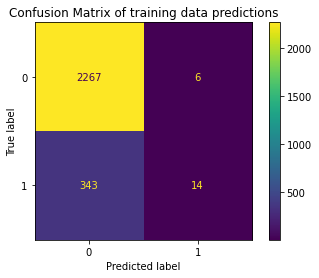

In [268]:
# Calling the created confusion matrix function on the training set. 

my_conf_matrix(Y_train, y_hat, 'Confusion Matrix of training data predictions')

In [269]:
# Function which finds the predictions (in probability form) and using that to calculate the False/True positive rate and AUC.

def calculate_probs(independant, dependant):
    y_hat_proba = model.predict_proba(independant)[:,1]
    fpr, tpr, _ = metrics.roc_curve(dependant,  y_hat_proba)
    auc = metrics.roc_auc_score(dependant, y_hat_proba)
    return fpr, tpr, auc


In [288]:
# Creating a function thats plots the ROC curve and AUC metric.

def plot_roc_auc(false_pos, true_pos, auc, title):

    plt.figure(figsize=(12,8))

    plt.plot(false_pos,true_pos,label=f'AUC = {round(auc, 4)}')
    plt.plot([0,1], [0,1], 'r--')
    plt.xlim(0,1.05)
    plt.ylim(0,1.05)
    plt.title(title, fontsize=14)
    plt.ylabel('True Positive Rate', fontsize=14)
    plt.xlabel('False Positive Rate', fontsize=14)
    plt.legend(loc=4)
    plt.show()

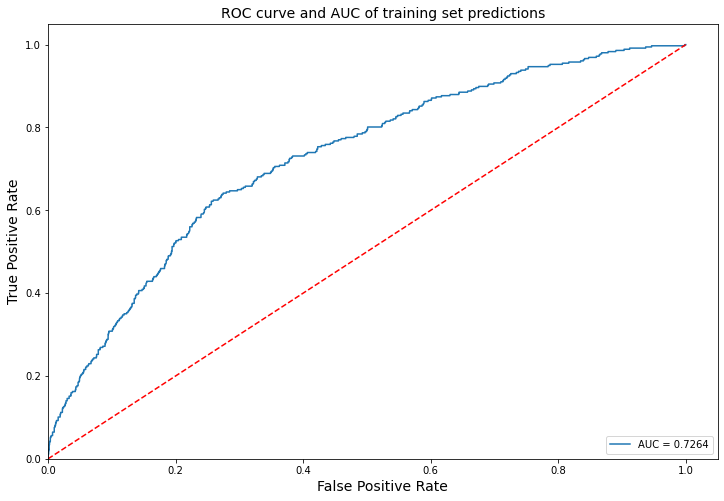

In [289]:
# Calling the function to find the probabilites, then plotting the results with the second created function.

training_metrics = calculate_probs(X_train, Y_train)
plot_roc_auc(training_metrics[0], training_metrics[1], training_metrics[2], 'ROC curve and AUC of training set predictions')

## Thresholding

C:\ProgramData\Miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


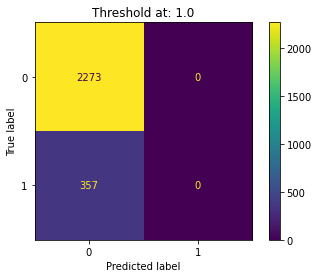

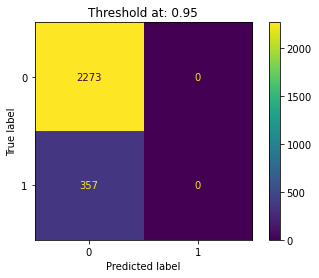

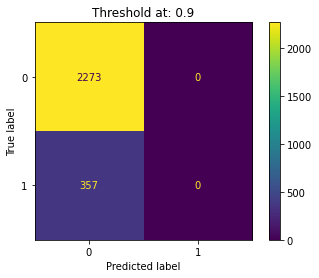

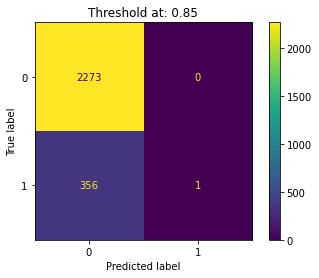

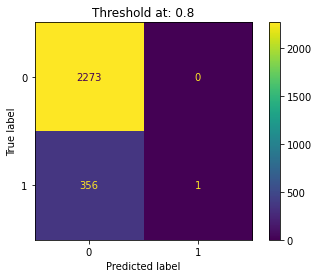

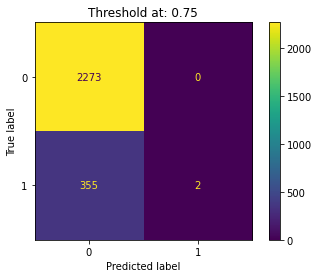

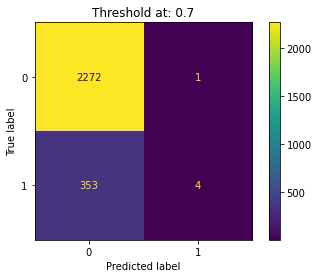

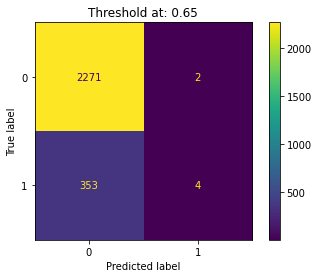

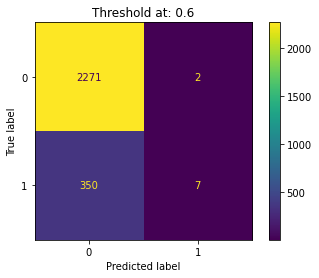

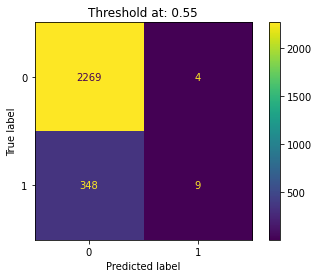

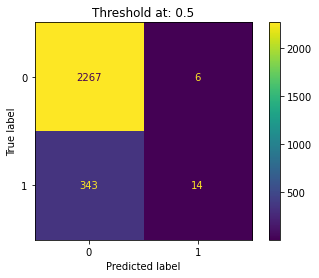

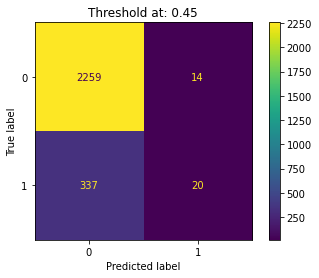

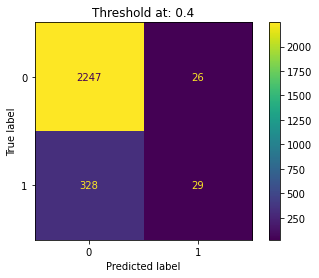

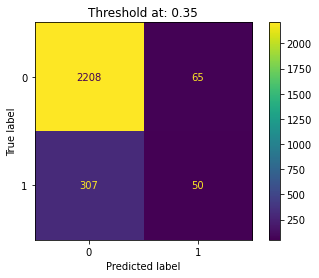

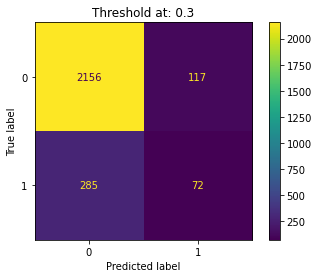

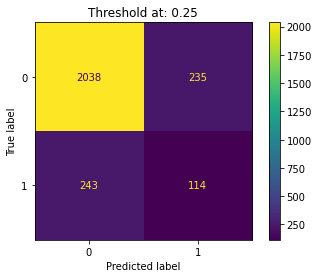

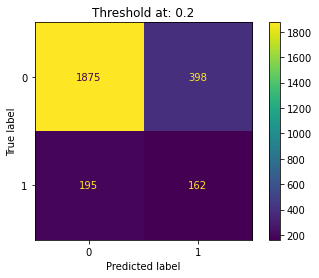

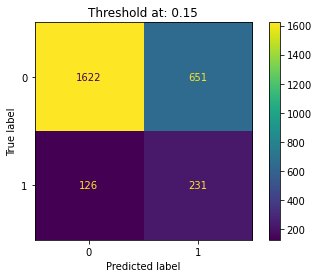

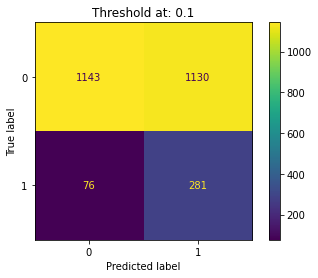

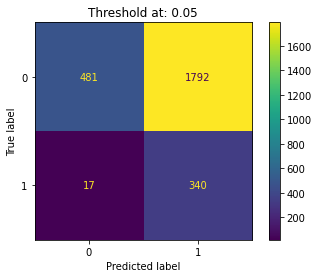

In [275]:
# Adjusting the threshold of what is considered a positive case, in order to increase Recall score.
# Priority given to recall score due to healthcare related dataset.


thresholds = []
accuracy_scores = []
precision_scores = []
recall_scores = []

# Looping through possible thresholds (from 1 down to 0.05)

for thresh in np.arange(1, 0, -0.05):
    adj_probs = model.predict_proba(X_train)[:,1]
    adj_predictions = [1 if x > thresh else 0 for x in adj_probs]
    
    
    # Appending the scores at each threshold to the lists above
    
    thresholds.append(round(thresh, 2))
    accuracy_scores.append(metrics.accuracy_score(Y_train, adj_predictions))
    precision_scores.append(metrics.precision_score(Y_train, adj_predictions))
    recall_scores.append(metrics.recall_score(Y_train, adj_predictions))
    
    
    # Showing a confusion matric at each threshold
    
    new_conf = metrics.confusion_matrix(Y_train,adj_predictions)
    metrics.ConfusionMatrixDisplay(new_conf).plot()
    plt.title(f'Threshold at: {round(thresh,2)}')

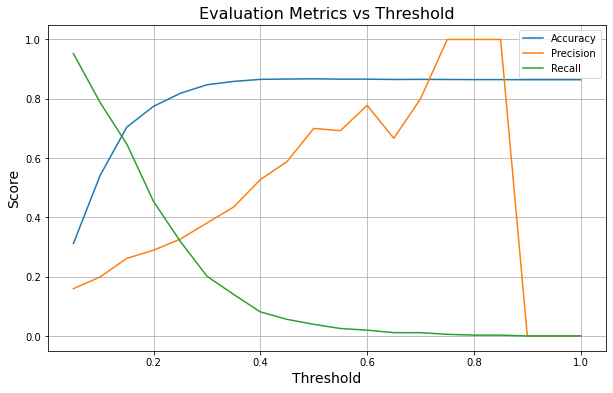

In [276]:
# Plotting the results of adjusting the thresholds. Assessing the balance between Recall and Accuracy.

plt.figure(figsize=(10, 6))

plt.plot(thresholds, accuracy_scores, label='Accuracy')
plt.plot(thresholds, precision_scores, label='Precision')
plt.plot(thresholds, recall_scores, label='Recall')

plt.xlabel('Threshold', fontsize=14)
plt.ylabel('Score', fontsize=14)
plt.title('Evaluation Metrics vs Threshold', fontsize=16)
plt.legend()
plt.grid()

plt.show()

In [283]:
print(f'The optimal threshold for the model stands at: {thresholds[-2]}. Giving a Recall score of: {round(recall_scores[-2], 2)}.')

The optimal threshold for the model stands at: 0.1. Giving a Recall score of: 0.79.


## Testing on unseen data

In [284]:
# Using the model to create predictions (with an adjusted threshold of 0.9) on the test dataset.

test_y_hat = model.predict_proba(X_test)[:,1]
test_y_hat_adj = [1 if x > 0.09 else 0 for x in test_y_hat]
print(f'Accuracy score is: {metrics.accuracy_score(Y_test, test_y_hat_adj)}')
print(f'Precision score is: {metrics.precision_score(Y_test, test_y_hat_adj)}')
print(f'Recall score is: {metrics.recall_score(Y_test, test_y_hat_adj)}')

Accuracy score is: 0.5547112462006079
Precision score is: 0.20857142857142857
Recall score is: 0.8202247191011236


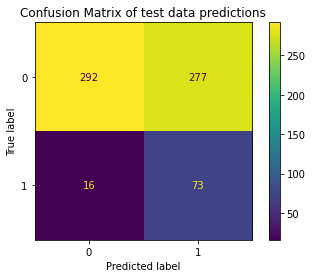

In [285]:
# Plotting a confusion matrix of the test set (at 0.9 threshold)

my_conf_matrix(Y_test, test_y_hat_adj, 'Confusion Matrix of test data predictions')

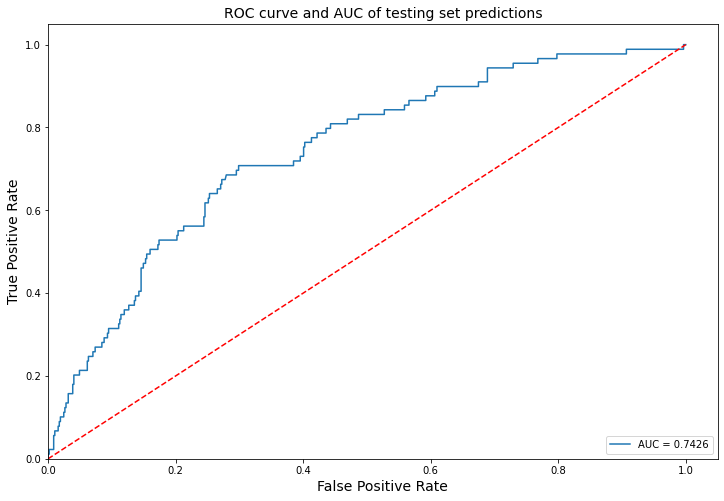

In [291]:
# Calculating the probabilites of the test data and evaluating the model.

testing_metrics = calculate_probs(X_test, Y_test)
plot_roc_auc(testing_metrics[0], testing_metrics[1], testing_metrics[2], 'ROC curve and AUC of testing set predictions')

## Conclusions

* Using only 5 statistically significant variables, a logistic regression model can be created to predict whether a patient will have CHD within 10 years.
* The model arrived achieved an AUC score between 0.72-0.74, proving to be reasonably good at classifying positive cases.
* When evaluating the model, a focus on the Recall score was given due to the healthcare/medical nature of the underlying data where False negatives are potentially life-threatening mistakes.
* The model achieved a Recall score of 0.79 while maintaining the number of False positives below that of the number of True negatives.